In [1]:
from qick import *
from qick.rfboard import RFQickSoc216V1
from test_rf216_v1 import *

import pynq.overlay

from tqdm.auto import tqdm

import numpy as np
from numpy.fft import fft, fftshift
from scipy.signal import welch

import matplotlib.pyplot as plt

import scipy.io

In [2]:
# Load bitstream with custom overlay
# soc = RFBoardTestSoc('./test_rf216_v1.bit', clk_output=None, no_tproc=True)
# soc = RFBoardTestSoc('./test_rf216_v1_kt.bit', clk_output=None, no_tproc=True)
soc = RFBoardTestSoc('./test_rf216_v2_kt.bit', clk_output=None, no_tproc=True)
# soc = RFBoardTestSoc('./test_rf216_v2_ktx.bit', clk_output=None, no_tproc=True)
# soc = RFBoardTestSoc('./test_rf216_v2-dc_tst_kt.bit', clk_output=None, no_tproc=True)

# soc = RFQickSoc216V1('/home/xilinx/jupyter_notebooks/fw/qick_rf216/qick_rf216_v2.bit', clk_output=None)


#soc = QickSoc('../qick/qick_lib/qick/qick_216.bit')
soccfg = soc

print(soccfg)

resetting clocks: 245.76 491.52

QICK configuration:

	Board: ZCU216


In [3]:
# soc = RFBoardTestSoc('./test_rf216_v1_.bit', clk_output=None, no_tproc=True)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [4]:
# soc = RFBoardTestSoc('./test_rf216_v1.bit', clk_output=None, no_tproc=True)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [5]:
# soc = RFBoardTestSoc('./test_rf216_v1_kt.bit', clk_output=None, no_tproc=True)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [6]:
# soc = RFBoardTestSoc('./test_rf216_v2_ktx.bit', clk_output=None, no_tproc=True)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [7]:
# soc = RFBoardTestSoc('./test_rf216_v1_kt.bit', clk_output=None, no_tproc=True)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [8]:
# soc = RFBoardTestSoc('./test_rf216_v2_kt.bit', clk_output=None, no_tproc=True)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [9]:
# soc = RFBoardTestSoc('./test_rf216_v2-dc_tst_kt.bit', clk_output=None, no_tproc=True)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [10]:
# soc = RFQickSoc216V1('/home/xilinx/jupyter_notebooks/fw/qick_rf216/qick_rf216_v2.bit', clk_output=None)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [11]:
# soc = RFQickSoc216V1('/home/xilinx/jupyter_notebooks/fw/2024-08-23_216_tprocv2r20_rfb/qick_216_rfb.bit', clk_output=None)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [12]:
# soc = RFQickSoc216V1('/home/xilinx/jupyter_notebooks/fw/2024-08-23_216_tprocv2r20_rfb-spifix/qick_216_rfb.bit', clk_output=None)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [13]:
# debug = False
# for chain in soc.adc_chains:
#     print(bin(chain.read_filter(reg='CHIPTYPE',debug=debug)))
# #     print(bin(chain.read_filter(reg='WR0_SW',debug=debug)))
# #     print(bin(chain.read_filter(reg='WR0_FILTER',debug=debug)))

In [14]:
# debug = False
# for chain in soc.dac_chains:
#     print(bin(chain.read_filter(reg='CHIPTYPE',debug=debug)))
# #     print(bin(chain.read_filter(reg='WR0_SW',debug=debug)))
# #     print(bin(chain.read_filter(reg='WR0_FILTER',debug=debug)))


Text(0.5, 0, 'MHz')

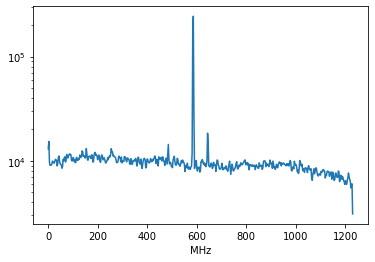

In [15]:
###################
### DAC Setting ###
###################
dac_channel = 15

freq =5500
nqz = 2

# Set output tone.
soc.generator.set(f=freq, g=0.99, ch=dac_channel)

# Set Nyquist Zone.
soc.set_nyquist(nqz=nqz, ch=dac_channel, btype='dac')

# Set Filter.
#fc = 2.051  # 2.051 is the lowest fc value for a low pass filter
fc = freq/1000
bw = 1
soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype='bandpass')
#soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype='lowpass')

# Set attenuator on DAC.
soc.dac_chains[dac_channel].set_attn_db(attn=0, db=30)
soc.dac_chains[dac_channel].set_attn_db(attn=1, db=30)
###################
### ADC Setting ###
###################
adc_channel = 4
nqz = 2

# Set Filter.
fc = freq/1000
bw = 1.0
soc.adc_chains[adc_channel].set_filter(fc=fc, bw=bw, ftype='bandpass',debug=False)
# soc.adc_chains[adc_channel].set_filter(fc=2.051, bw=bw, ftype='lowpass',debug=False)

# Set attenuator on ADC.
soc.adc_chains[adc_channel].set_attn_db(db=20)

# Set Nyquist Zone.
soc.set_nyquist(nqz=nqz, ch=adc_channel, btype='adc')

# Get data.
fs = soc.buffer.fs
x = soc.buffer.get_data(ch=adc_channel)

fft_freqs, psd = welch(x, fs, return_onesided=True, nperseg=1024, detrend=False)
plt.semilogy(fft_freqs, psd)
plt.xlabel("MHz")

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

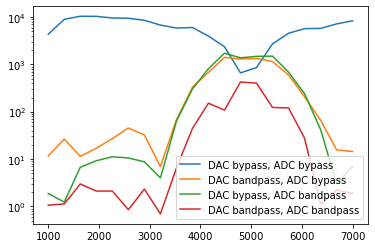

In [16]:
# dac_channel = 14
# adc_channel = 5
# atts = (10, 30, 20)
dac_channel = 15
adc_channel = 4
atts = (30, 30, 20)


# Set Nyquist Zone.
soc.set_nyquist(nqz=2, ch=dac_channel, btype='dac')

# # Set Nyquist Zone.
# soc.set_nyquist(nqz=2, ch=adc_channel, btype='adc')


# Set attenuator on DAC.
soc.dac_chains[dac_channel].set_attn_db(attn=0, db=atts[0])
soc.dac_chains[dac_channel].set_attn_db(attn=1, db=atts[1])

# Set attenuator on ADC.
soc.adc_chains[adc_channel].set_attn_db(db=atts[2])

freq =5500
fc = freq/1000
bw = 1.0

# Set Filter.
#fc = 2.051  # 2.051 is the lowest fc value for a low pass filter
# fc = freq/1000
# bw = 1
# soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype='bandpass')
# #soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype='lowpass')
# # soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype='bypass')


# # Set Filter.
# fc = freq/1000
# bw = 1.0
# soc.adc_chains[adc_channel].set_filter(fc=fc, bw=bw, ftype='bandpass',debug=False)
# # soc.adc_chains[adc_channel].set_filter(fc=2.051, bw=bw, ftype='lowpass',debug=False)
# # soc.adc_chains[adc_channel].set_filter(fc=fc, bw=bw, ftype='bypass',debug=False)

fs = soc.buffer.fs
freqs = np.linspace(1000, 7000, 20)


for filtmode in [('bypass','bypass'), ('bandpass','bypass'), ('bypass','bandpass'), ('bandpass','bandpass')]:
    soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype=filtmode[0],debug=False)
    soc.adc_chains[adc_channel].set_filter(fc=fc, bw=bw, ftype=filtmode[1],debug=False)
    
    powers = []
    for i,f_tone in enumerate(tqdm(freqs)):
        # Set output tone.
        soc.generator.set(f=f_tone, g=0.99, ch=dac_channel)

        # Get data.
        x = soc.buffer.get_data(ch=adc_channel)

        rounded_freq = np.round(f_tone/soc.generator.ctrl.df)*soc.generator.ctrl.df
        demod = np.exp(1j*2*np.pi*np.arange(len(x))*rounded_freq/fs)*x
        powers.append(np.abs(demod.mean()))

    plt.semilogy(freqs,powers, label="DAC %s, ADC %s"%(filtmode[0], filtmode[1]))
    
plt.legend();

In [17]:
print(soc.generator.ctrl.fs)
print(soc.buffer.fs)

9830.4
2457.6
